In [241]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score, f1_score, classification_report, precision_recall_curve
from jupyterthemes import jtplot
jtplot.style()

Read the CSV 

In [242]:
df_train = pd.read_csv('Advertisement Success Prediction train.csv')
df_test = pd.read_csv('Advertisement Success Prediction test.csv')

In [243]:
df_train.head()

,UserID,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,UI_9185,Married-civ-spouse,Pharma,Comedy,Male,40,Daytime,United-States,0.027465,Medium,No,0
1,UI_449,Never-married,Political,Comedy,Male,35,Morning,International,0.027465,Low,No,0
2,UI_9014,Never-married,Auto,Comedy,Male,40,Morning,United-States,0.027465,Low,No,0
3,UI_14987,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,Low,Yes,0
4,UI_25532,Married-civ-spouse,Other,Comedy,Female,50,Primetime,United-States,0.027465,Low,Yes,1


In [244]:
df_test.head()

,UserID,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee
0,UI_8772,Never-married,Entertainment,Infomercial,Female,40,Primetime,United-States,0.027465,High,Yes
1,UI_13139,Divorced,Auto,Comedy,Female,40,Primetime,United-States,0.027465,Low,No
2,UI_15381,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,High,No
3,UI_15503,Never-married,Auto,Comedy,Male,30,Primetime,United-States,0.027465,High,Yes
4,UI_16556,Never-married,Political,Comedy,Male,70,Morning,United-States,0.027465,Low,No


In [245]:
df_train.shape

(19536, 12)

In [246]:
df_test.shape

(6512, 11)

In [247]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19536 entries, 0 to 19535
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   UserID                             19536 non-null  object 
 1   realtionship_status                19536 non-null  object 
 2   industry                           19536 non-null  object 
 3   genre                              19536 non-null  object 
 4   targeted_sex                       19536 non-null  object 
 5   average_runtime(minutes_per_week)  19536 non-null  int64  
 6   airtime                            19536 non-null  object 
 7   airlocation                        19536 non-null  object 
 8   ratings                            19536 non-null  float64
 9   expensive                          19536 non-null  object 
 10  money_back_guarantee               19536 non-null  object 
 11  netgain                            19536 non-null  int

In [248]:
df_train.describe()

,average_runtime(minutes_per_week),ratings,netgain
count,19536.000000,19536.000000,19536.000000
mean,40.375665,0.038826,0.238022
std,12.483166,0.075971,0.425884
min,1.000000,0.000000,0.000000
25%,40.000000,0.027465,0.000000
50%,40.000000,0.027465,0.000000
75%,45.000000,0.027465,0.000000
max,99.000000,1.000000,1.000000


# EDA Visualization

In [249]:
import pandas_profiling as pp
pp.ProfileReport(df_train)

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

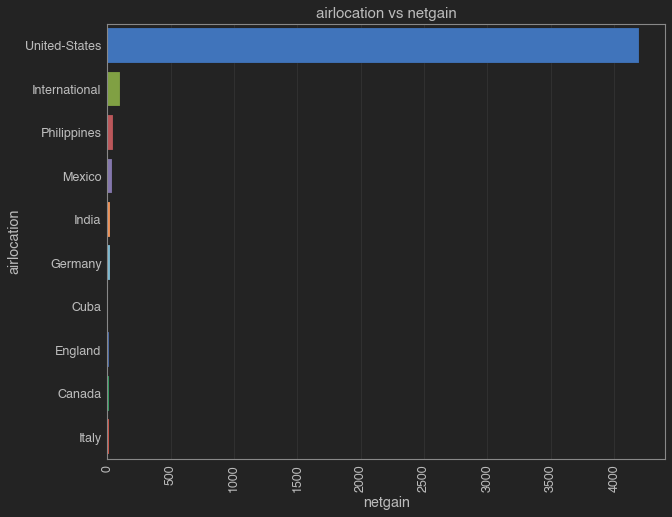

In [250]:
Data_per_country = df_train.groupby(["airlocation"])["netgain"].sum().reset_index().sort_values("netgain",ascending=False).reset_index(drop=True)
top10_netgain_countries = Data_per_country.iloc[:10]
#top10_netgain_countries

plt.figure(figsize=[10,8])
sns.barplot(top10_netgain_countries['netgain'],top10_netgain_countries['airlocation'],saturation=.85,errcolor='.045',ci=None)
plt.title('airlocation vs netgain',fontsize=15,loc='center')
plt.xticks(rotation = 90)

Text(0.5, 1.0, 'Total % of netgain')

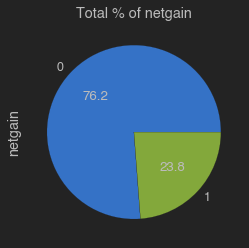

In [251]:
plt.figure(figsize=(10,7))
df_train['netgain'].value_counts().plot.pie(figsize=(6,4),autopct='%.1f')
plt.title('Total % of netgain')

<AxesSubplot:>

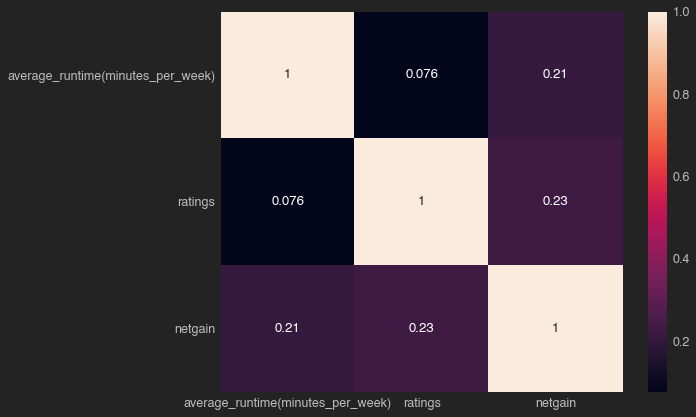

In [252]:
plt.figure(figsize=(9,7))
sns.heatmap(df_train.corr(), annot=True, fmt = '.2g')

In [253]:
df_train['ratings'].unique()

array([0.02746467, 0.08051701, 0.17357984, 0.29810451, 1.        ,
       0.07041226, 0.0701205 , 0.05272167, 0.09844101, 0.0669889 ,
       0.10223394, 0.16443792, 0.05326629, 0.05309124, 0.05028058,
       0.16696653, 0.05011525, 0.04793675, 0.08310397, 0.07621836,
       0.07782306, 0.07268802, 0.0421112 , 0.12977641, 0.27289614,
       0.1112397 , 0.05797341, 0.09065092, 0.06115363, 0.03887263,
       0.08988261, 0.05980179, 0.03324159, 0.04494131, 0.11874775,
       0.22246968, 0.15924453, 0.        , 0.05764275, 0.10425683,
       0.03136458, 0.0486078 , 0.06547173, 0.00342336, 0.0555226 ,
       0.04913298, 0.0652675 , 0.05629091, 0.05497797, 0.00325803,
       0.04740185, 0.09081626, 0.10505432, 0.0740204 , 0.06084242,
       0.03802651, 0.07304786, 0.00397771, 0.05087383, 0.00214933,
       0.08149928, 0.05929607, 0.03772502, 0.04888011, 0.0998512 ,
       0.00269395, 0.05035838, 0.06107583, 0.35905391, 0.06070626,
       0.0642366 , 0.07477899, 0.0454373 , 0.42922303, 0.06580

<AxesSubplot:xlabel='ratings', ylabel='netgain'>

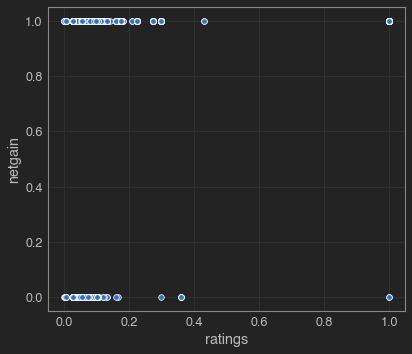

In [254]:
sns.scatterplot(df_train['ratings'], df_train['netgain'])

In [255]:
df_train = df_train.drop(['UserID'],1)

In [560]:
cat_v = df_train.select_dtypes('O')
num_v = df_train.select_dtypes('int','float')

In [561]:
# from sklearn.preprocessing import LabelEncoder

# for i in cat_v.columns:
#     le = LabelEncoder()
#     cat_v[i] = le.fit_transform(cat_v[i])

In [562]:
cat_v.columns

Index(['realtionship_status', 'industry', 'genre', 'targeted_sex', 'airtime',
       'airlocation', 'expensive', 'money_back_guarantee'],
      dtype='object')

In [563]:
df = pd.concat([cat_v,num_v],1)
df.head()

,realtionship_status,industry,genre,targeted_sex,airtime,airlocation,expensive,money_back_guarantee,average_runtime(minutes_per_week),netgain
0,Married-civ-spouse,Pharma,Comedy,Male,Daytime,United-States,Medium,No,40,0
1,Never-married,Political,Comedy,Male,Morning,International,Low,No,35,0
2,Never-married,Auto,Comedy,Male,Morning,United-States,Low,No,40,0
3,Married-civ-spouse,Pharma,Infomercial,Male,Primetime,United-States,Low,Yes,40,0
4,Married-civ-spouse,Other,Comedy,Female,Primetime,United-States,Low,Yes,50,1


In [564]:
df1 = pd.get_dummies(df,columns=['realtionship_status', 'industry', 'genre', 'targeted_sex', 'airtime',
       'airlocation', 'expensive', 'money_back_guarantee'],drop_first=False)

In [565]:
df1.shape

(19536, 72)

In [566]:
df = df1

In [567]:
X = df.drop(['netgain'],1)
y = df['netgain']

[0.26 0.02 0.02 0.04 0.02 0.   0.   0.   0.02 0.02 0.   0.06 0.   0.02
 0.   0.02 0.02 0.02 0.   0.02 0.02 0.02 0.02 0.   0.02 0.02 0.   0.
 0.   0.02 0.02 0.   0.   0.02 0.02 0.   0.   0.   0.   0.02 0.   0.
 0.02 0.02 0.   0.   0.   0.02 0.   0.02 0.02 0.   0.   0.02 0.02 0.
 0.   0.02 0.   0.02 0.02 0.   0.   0.   0.02 0.   0.02 0.   0.   0.
 0.  ]


<AxesSubplot:>

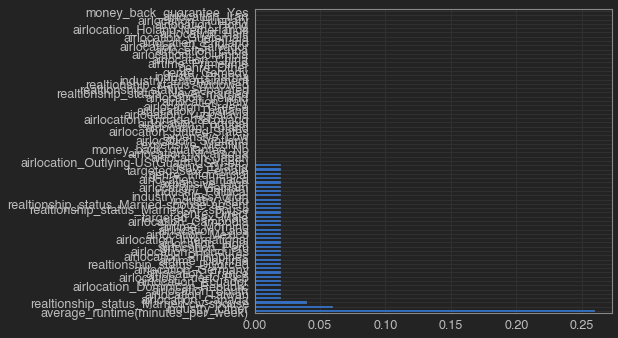

In [568]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

model_features_importance=AdaBoostClassifier()
model_features_importance.fit(X,y)
print(model_features_importance.feature_importances_)
ranked_features=pd.Series(model_features_importance.feature_importances_,index=X.columns)
ranked_features.nlargest(72).plot(kind='barh')

In [569]:
feature_sel = ranked_features.nlargest(40).index
feature_sel

Index(['average_runtime(minutes_per_week)', 'industry_Other',
       'realtionship_status_Married-civ-spouse',
       'realtionship_status_Divorced', 'realtionship_status_Married-AF-spouse',
       'realtionship_status_Married-spouse-absent', 'industry_Auto',
       'industry_ClassAction', 'industry_Political', 'genre_Direct',
       'genre_Drama', 'genre_Infomercial', 'targeted_sex_Female',
       'targeted_sex_Male', 'airtime_Daytime', 'airtime_Morning',
       'airlocation_Cambodia', 'airlocation_Canada',
       'airlocation_Dominican-Republic', 'airlocation_Ecuador',
       'airlocation_France', 'airlocation_Germany', 'airlocation_Honduras',
       'airlocation_India', 'airlocation_International', 'airlocation_Jamaica',
       'airlocation_Laos', 'airlocation_Mexico', 'airlocation_Peru',
       'airlocation_Philippines', 'airlocation_Puerto-Rico',
       'airlocation_South', 'airlocation_Taiwan', 'airlocation_Vietnam',
       'expensive_High', 'realtionship_status_Never-married',
 

In [570]:
df = df[feature_sel]

* Split the data

In [571]:
X = df
y = df_train['netgain']

In [572]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

* Checking for Class imbalance and tackling it.

In [573]:
#Checking for Class imbalance and tackling it
#For netgain yes for 1, output label=1, for any other no netgain for 0, label=0
y_train=((y_train==1).astype(int))  
y_test=((y_test==1).astype(int))
y_train.value_counts()

0    10437
1     3238
Name: netgain, dtype: int64

#  Model Training 

In [587]:
from sklearn.ensemble import RandomForestClassifier
reg = RandomForestClassifier( n_estimators=125, 
                               max_depth=9,
                              class_weight={0:0.7,1:1.2},
                            )

reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
f1score = f1_score(y_test, y_pred)
print(f1score)

0.6228020419739081


In [588]:
reg.fit(X,y)


RandomForestClassifier(class_weight={0: 0.7, 1: 1.2}, max_depth=9,
                       n_estimators=125)

# Model Results

In [589]:
classification_report_ = classification_report(y_test,y_pred)
print(classification_report_)

              precision    recall  f1-score   support

           0       0.92      0.77      0.84      4449
           1       0.52      0.78      0.62      1412

    accuracy                           0.77      5861
   macro avg       0.72      0.77      0.73      5861
weighted avg       0.82      0.77      0.79      5861



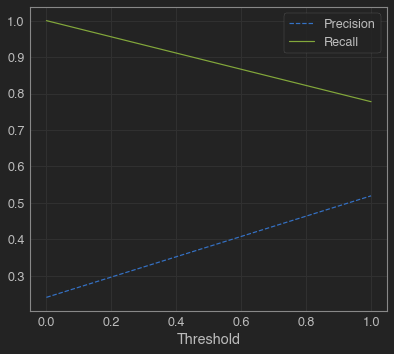

In [590]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision") 
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend()
plot_precision_recall_vs_threshold(precisions, recalls, thresholds) 
plt.show()

In [591]:
# l1 = []
# for i in range(30,50):
#     for j in range(30,50):
#         reg = RandomForestClassifier(n_estimators=150, max_depth=13,
#                                 class_weight={0:i,1:j},
#                                 ).fit(X_train,y_train)
#         y_pred = reg.predict(X_test)
#         f1score = f1_score(y_test, y_pred)
#         l1.append(f1score)
#         print('value of i is {} & j is {}'.format(i,j))
#         print('f1_score is',f1score)
#         print('*'*30)

# max(l1)

* Preparing the test data for prediction

In [592]:
cat_v1 = df_test.select_dtypes('O')
num_v1 = df_test.select_dtypes('int','float')
# for i in cat_v1.columns:
#     le = LabelEncoder()
#     cat_v1[i] = le.fit_transform(cat_v1[i])
df22 = pd.concat([cat_v1,num_v1],1)

df23 = pd.get_dummies(df22,columns=['realtionship_status', 'industry', 'genre', 'targeted_sex', 'airtime',
       'airlocation', 'expensive', 'money_back_guarantee'],drop_first=False)
    


In [593]:
#  df23 = df23.drop(['UserID'],1)

In [594]:
df23 = df23[feature_sel]

# Prediction on test data

In [595]:
y_test_pred = reg.predict(df23)

In [596]:
output = pd.DataFrame(y_test_pred, columns=['netgain'])
output

,netgain
0,0
1,0
2,1
3,0
4,0
...,...
6507,0
6508,0
6509,1
6510,0


In [597]:
output.to_csv('Advertisement_.csv',index=False)

In [411]:
from pycaret.classification import *
exp1 = setup(df_train, target = 'netgain',)

IntProgress(value=0, description='Processing: ', max=13)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:41:10
Status,. . . . . . . . . . . . . . . . . .,Preparing Data for Modeling
ETC,. . . . . . . . . . . . . . . . . .,Calculating ETC


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
realtionship_status,Categorical
industry,Categorical
genre,Categorical
targeted_sex,Categorical
average_runtime(minutes_per_week),Numeric
airtime,Categorical
airlocation,Categorical
ratings,Numeric
expensive,Categorical
money_back_guarantee,Categorical


KeyboardInterrupt: Interrupted by user

In [ ]:
# compare_models()